In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
dataset_url = "https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis/data"
od.download(dataset_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mikemwita
Your Kaggle Key: ··········


100%|██████████| 11.7k/11.7k [00:00<00:00, 15.9MB/s]

In [ ]:
import pandas as pd

df = pd.read_csv('student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv')
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [ ]:
# No missing values to handle in the dataset

In [ ]:
# Analytical question: What are the key factors that contribute to student stress, and how do they vary by student characteristics?



Data preprocessing

In [ ]:
# Handling missing values (filling with the mean)
df.fillna(df.mean(), inplace=True)




In [ ]:
# Exploratory Data Analysis (EDA)
# Summary statistics
summary_stats = df.describe()

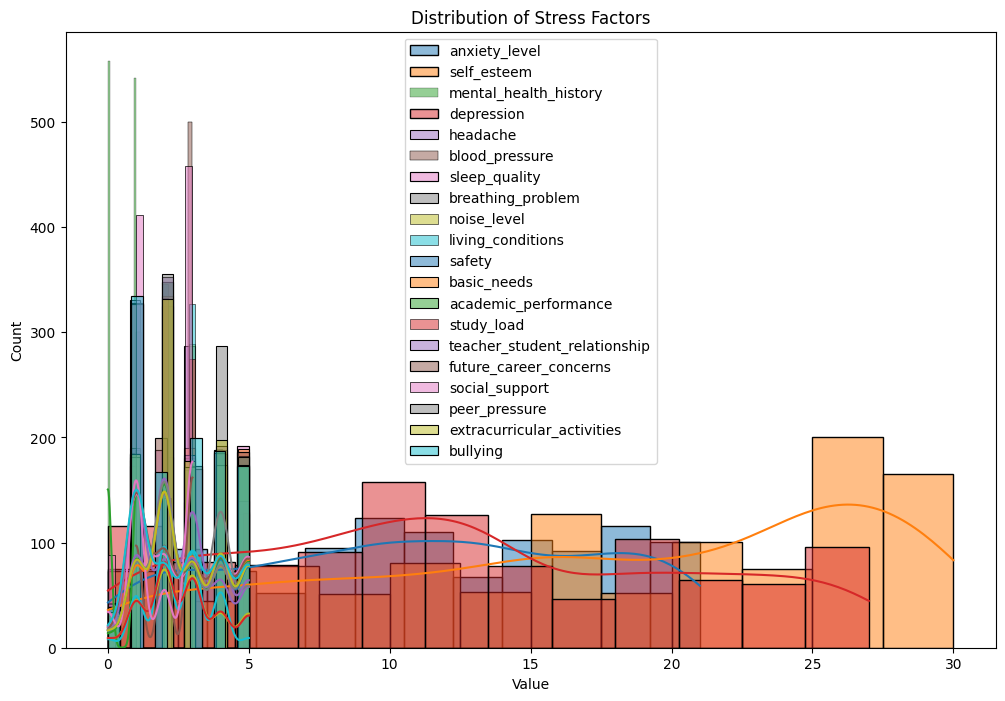

In [ ]:
plt.figure(figsize=(12, 8))
for col in df.columns[:-1]:
    sns.histplot(df[col], kde=True, label=col)
plt.title('Distribution of Stress Factors')
plt.xlabel('Value')
plt.legend()
plt.show()

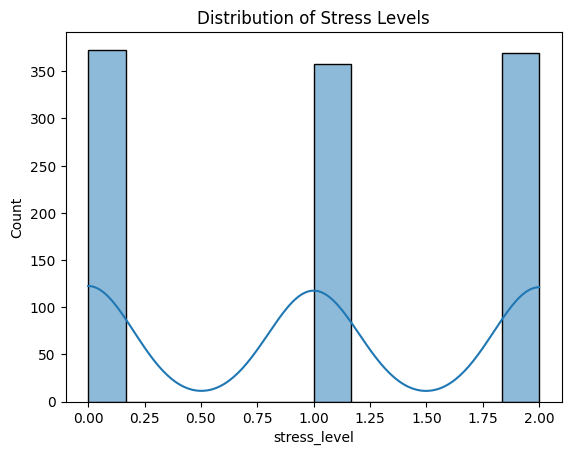

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Plot the distribution of stress levels
sns.histplot(df['stress_level'], kde=True)
plt.title('Distribution of Stress Levels')
plt.show()




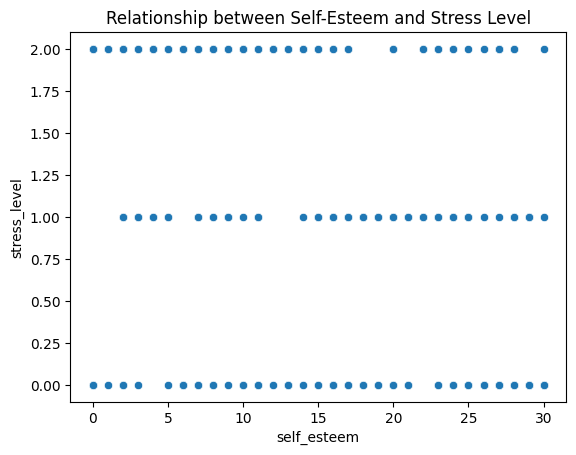

In [ ]:
#  Visualize the relationship between self-esteem and stress level
sns.scatterplot(x='self_esteem', y='stress_level', data=df)
plt.title('Relationship between Self-Esteem and Stress Level')
plt.show()

In [ ]:
# Statistical analysis

In [ ]:
# Perform ANOVA based on academic performance
f_statistic, p_value = stats.f_oneway(*[df[df['academic_performance'] == level]['stress_level'] for level in df['academic_performance'].unique()])
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print('ANOVA test indicates a significant difference in stress levels based on academic performance.')
else:
    print('No significant difference in stress levels based on academic performance.')


F-statistic: 345.9695397142932
P-value: 2.503996400816462e-222
ANOVA test indicates a significant difference in stress levels based on academic performance.


Data Visualizations


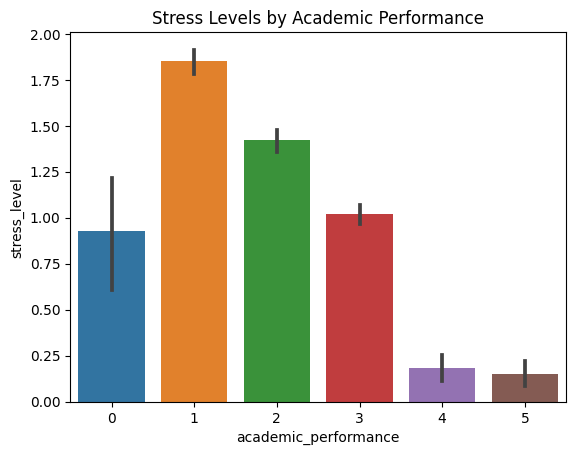

In [ ]:
#  Bar chart to illustrate stress levels by academic performance
sns.barplot(x='academic_performance', y='stress_level', data=df)
plt.title('Stress Levels by Academic Performance')
plt.show()

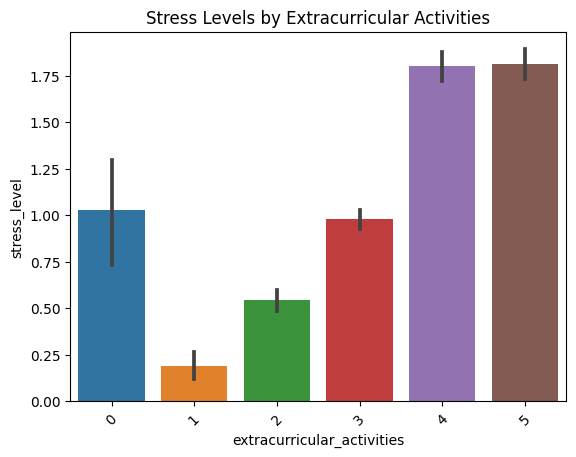

In [ ]:
# : Bar chart to illustrate stress levels by extracurricular activities
sns.barplot(x='extracurricular_activities', y='stress_level', data=df)
plt.title('Stress Levels by Extracurricular Activities')
plt.xticks(rotation=45)
plt.show()



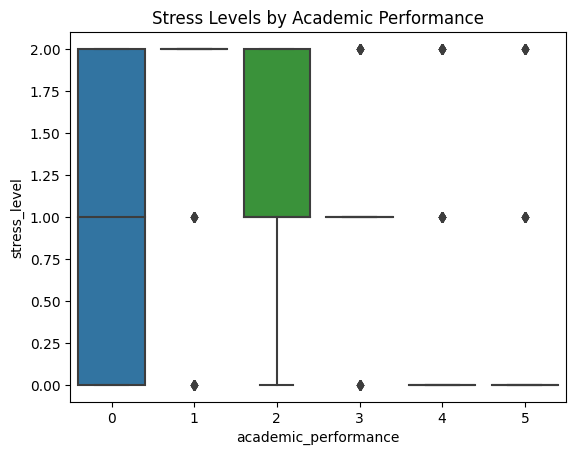

In [ ]:

#  Box plot to illustrate stress levels by academic performance
sns.boxplot(x='academic_performance', y='stress_level', data=df)
plt.title('Stress Levels by Academic Performance')
plt.show()


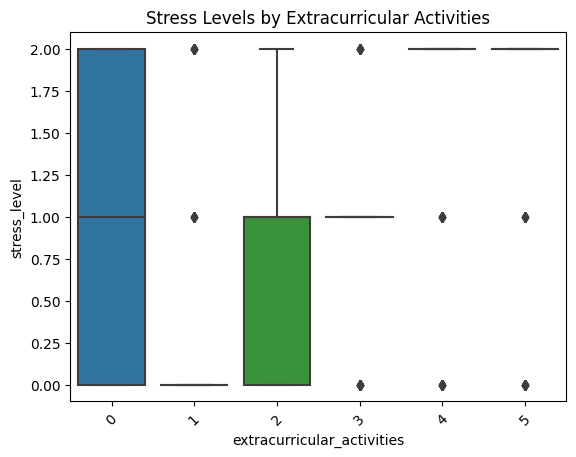

In [ ]:
# Box plot to illustrate stress levels by extracurricular activities
sns.boxplot(x='extracurricular_activities', y='stress_level', data=df)
plt.title('Stress Levels by Extracurricular Activities')
plt.xticks(rotation=45)
plt.show()


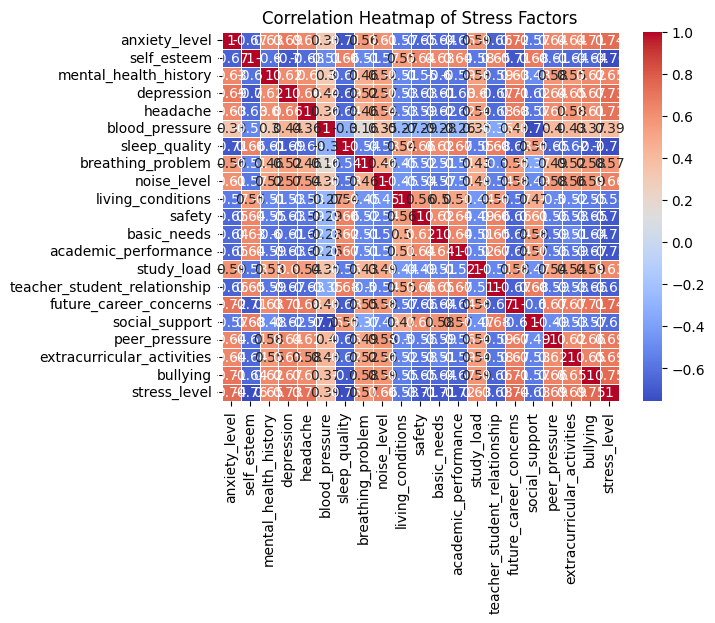

<Figure size 1600x1000 with 0 Axes>

In [ ]:
#  a heatmap to show the correlation between stress factors

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Stress Factors')
plt.figure(figsize=(16, 10))

plt.show()

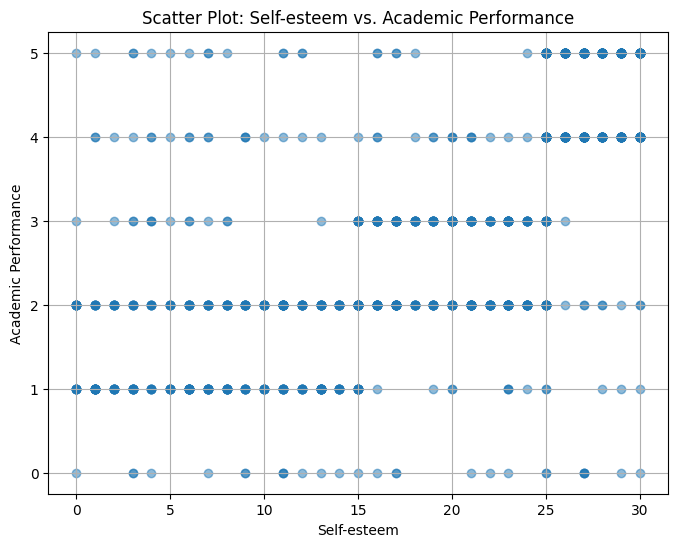

In [ ]:
import matplotlib.pyplot as plt

# Scatter Plot: Self-esteem vs. Academic Performance
plt.figure(figsize=(8, 6))
plt.scatter(df['self_esteem'], df['academic_performance'], alpha=0.5)
plt.title('Scatter Plot: Self-esteem vs. Academic Performance')
plt.xlabel('Self-esteem')
plt.ylabel('Academic Performance')
plt.grid(True)
plt.show()